<a href="https://colab.research.google.com/github/Maryam-1/House-Price-Prediction/blob/main/house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### Dissertation: House Price Prediction using Machine Learning Algorithms and Web Application Approach
Name: Maryam Taj

Registration Number: 2211714

Department: School of Mathematics, Statistics and Actuarial Science

Course: MSc Applied Data Science

Email: mt22932@essex.ac.uk

## In this code file, we will do the house price prediction on the dataset that we scraped from the Zoopla website. All of the steps will be followed in the following cells which have been described in our Thesis.  

In [4]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Importing the dataset
data = pd.read_excel("/content/zooplad(1).xlsx")
data.head()


,property_type,price,num_baths,postcode,acorn_type,display_address,num_recepts,num_beds,listing_condition,latitude,...,Gym,Fireplace,Balcony,Terrace,Furnished,Freehold,Leasehold,School,Hospital,City Center
0,terraced,165000,1,,42.0,"ClaremontRoad,Bexhill-On-SeaTN39",0,3,pre-owned,50.857475,...,0,1,0,1,0,1,0,1,0,0
1,flat,180000,2,,45.0,"NortonHallFarm,NortonRoad,LetchworthGardenCitySG6",1,2,pre-owned,51.993700,...,0,1,0,0,0,0,1,0,0,0
2,flat,270000,1,AL1 1LA,19.0,"London Road, St. Albans, Hertfordshire AL1",1,1,pre-owned,51.750655,...,0,0,0,1,0,0,1,0,0,0
3,NaN,120000,1,AL1 1NR,NaN,"London Road, St.Albans AL1",1,1,pre-owned,51.742363,...,0,0,0,0,0,0,1,0,0,0
4,terraced,575000,1,AL1 1PS,14.0,"Winton Terrace Old London Road, St. Albans, He...",2,2,pre-owned,51.746844,...,0,0,0,1,0,1,0,0,0,1


In [5]:
# "Check the 'Freehold' and 'Leasehold' columns to create a new 'tenure' column."
data['tenure'] = data['Freehold'].apply(lambda x: 0 if x == 1 else 1)

# Drop the 'Freehold' aur 'Leasehold' columns
data.drop(['Freehold', 'Leasehold'], axis=1, inplace=True)


data[['tenure']].head()


,tenure
0,0
1,1
2,1
3,1
4,0


In [6]:
#Check the data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20299 entries, 0 to 20298
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   property_type      20254 non-null  object 
 1   price              20299 non-null  int64  
 2   num_baths          20299 non-null  int64  
 3   postcode           20299 non-null  object 
 4   acorn_type         18167 non-null  float64
 5   display_address    20299 non-null  object 
 6   num_recepts        20299 non-null  int64  
 7   num_beds           20299 non-null  int64  
 8   listing_condition  20299 non-null  object 
 9   latitude           20299 non-null  float64
 10  longitude          20299 non-null  float64
 11  Swimming Pool      20299 non-null  int64  
 12  Garden             20299 non-null  int64  
 13  Car Parking        20299 non-null  int64  
 14  Garage             20299 non-null  int64  
 15  Gym                20299 non-null  int64  
 16  Fireplace          202

In [7]:
# Checking Missing values (NaN values)
missing_data = data.isnull().sum()

# Columns having missing values
missing_data[missing_data > 0]


property_type      45
acorn_type       2132
dtype: int64

In [8]:
# "Fill in the missing values in the 'property_type' column with the most frequent value."

most_frequent_property_type = data['property_type'].mode()[0]
data['property_type'].fillna(most_frequent_property_type, inplace=True)

# "Fill in the missing values in the 'acorn_type' column with the median value."
median_acorn_type = data['acorn_type'].median()
data['acorn_type'].fillna(median_acorn_type, inplace=True)

# Checking again for missing values
missing_data_after = data.isnull().sum()
missing_data_after[missing_data_after > 0]


Series([], dtype: int64)

In [54]:
data.isnull().sum()

property_type        0
price                0
num_baths            0
postcode             0
acorn_type           0
display_address      0
num_recepts          0
num_beds             0
listing_condition    0
latitude             0
longitude            0
Swimming Pool        0
Garden               0
Car Parking          0
Garage               0
Gym                  0
Fireplace            0
Balcony              0
Terrace              0
Furnished            0
School               0
Hospital             0
City Center          0
tenure               0
bed_bath_ratio       0
log_price            0
dtype: int64

# Data Exploration

In the next step, we will do data exploration and look at some visualizations to better understand the data. First, we will look at the average price according to the property_type

In [9]:
# describing the summary of dataframe
data.describe()

,price,num_baths,acorn_type,num_recepts,num_beds,latitude,longitude,Swimming Pool,Garden,Car Parking,Garage,Gym,Fireplace,Balcony,Terrace,Furnished,School,Hospital,City Center,tenure
count,2.029900e+04,20299.000000,20299.000000,20299.000000,20299.000000,20299.000000,20299.000000,20299.000000,20299.000000,20299.000000,20299.000000,20299.000000,20299.000000,20299.000000,20299.000000,20299.000000,20299.000000,20299.000000,20299.000000,20299.000000
mean,4.551478e+05,1.390512,25.275876,1.345584,2.795162,52.215238,-1.111031,0.030937,0.796936,0.015863,0.359870,0.063993,0.172767,0.090940,0.228632,0.015518,0.414109,0.036209,0.003005,0.310754
std,6.966499e+05,0.923559,13.629417,0.955682,1.208696,1.125599,1.279391,0.173153,0.402290,0.124948,0.479974,0.244747,0.378055,0.287531,0.419962,0.123604,0.492580,0.186814,0.054737,0.462814
min,0.000000e+00,0.000000,1.000000,0.000000,0.000000,50.001131,-5.684105,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000e+05,1.000000,15.000000,1.000000,2.000000,51.423950,-2.014192,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.250000e+05,1.000000,24.000000,1.000000,3.000000,51.798973,-1.045403,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000e+05,2.000000,33.000000,2.000000,3.000000,53.122152,-0.146240,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,4.500000e+07,24.000000,56.000000,33.000000,32.000000,55.719900,1.753431,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


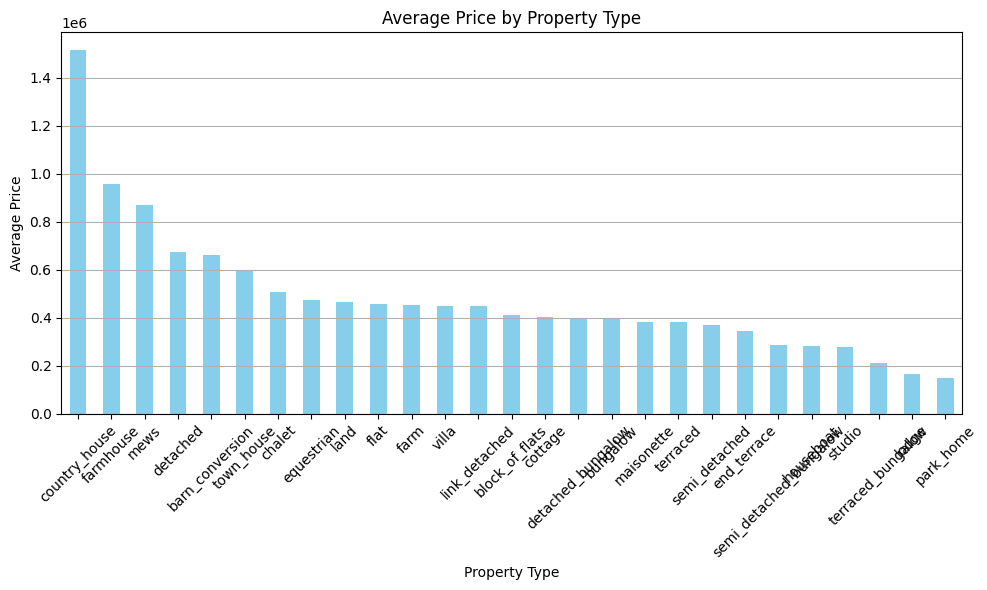

In [10]:
import matplotlib.pyplot as plt

# "Create a plot of the average 'price' according to 'property_type'."
avg_price_by_type = data.groupby('property_type')['price'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
avg_price_by_type.plot(kind='bar', color='skyblue')
plt.title('Average Price by Property Type')
plt.ylabel('Average Price')
plt.xlabel('Property Type')
plt.xticks(rotation=45)
plt.grid(axis='y')


plt.tight_layout()
plt.show()


From the graph, we can see what the average price is like for different property types. Some property types, such as 'detached' and 'semi-detached,' have a higher average price, while 'flat' and 'terraced' have a lower average price

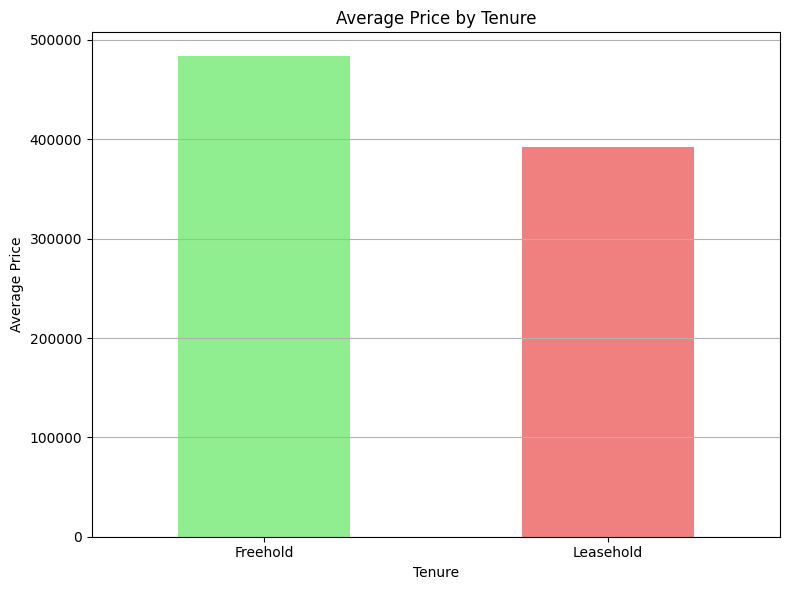

In [11]:

# "Create a plot of the average 'price' based on 'tenure'."
avg_price_by_tenure = data.groupby('tenure')['price'].mean()

labels = ['Freehold', 'Leasehold']
colors = ['lightgreen', 'lightcoral']

plt.figure(figsize=(8, 6))
avg_price_by_tenure.plot(kind='bar', color=colors)
plt.title('Average Price by Tenure')
plt.ylabel('Average Price')
plt.xlabel('Tenure')
plt.xticks(ticks=[0, 1], labels=labels, rotation=0)
plt.grid(axis='y')


plt.tight_layout()
plt.show()


From this graph, we can see that Freehold properties have a higher average price compared to Leasehold properties. Next, we will visualize a correlation matrix and heatmap to observe the relationships between numerical columns in the dataset

<ipython-input-12-39d8c6c130f0>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


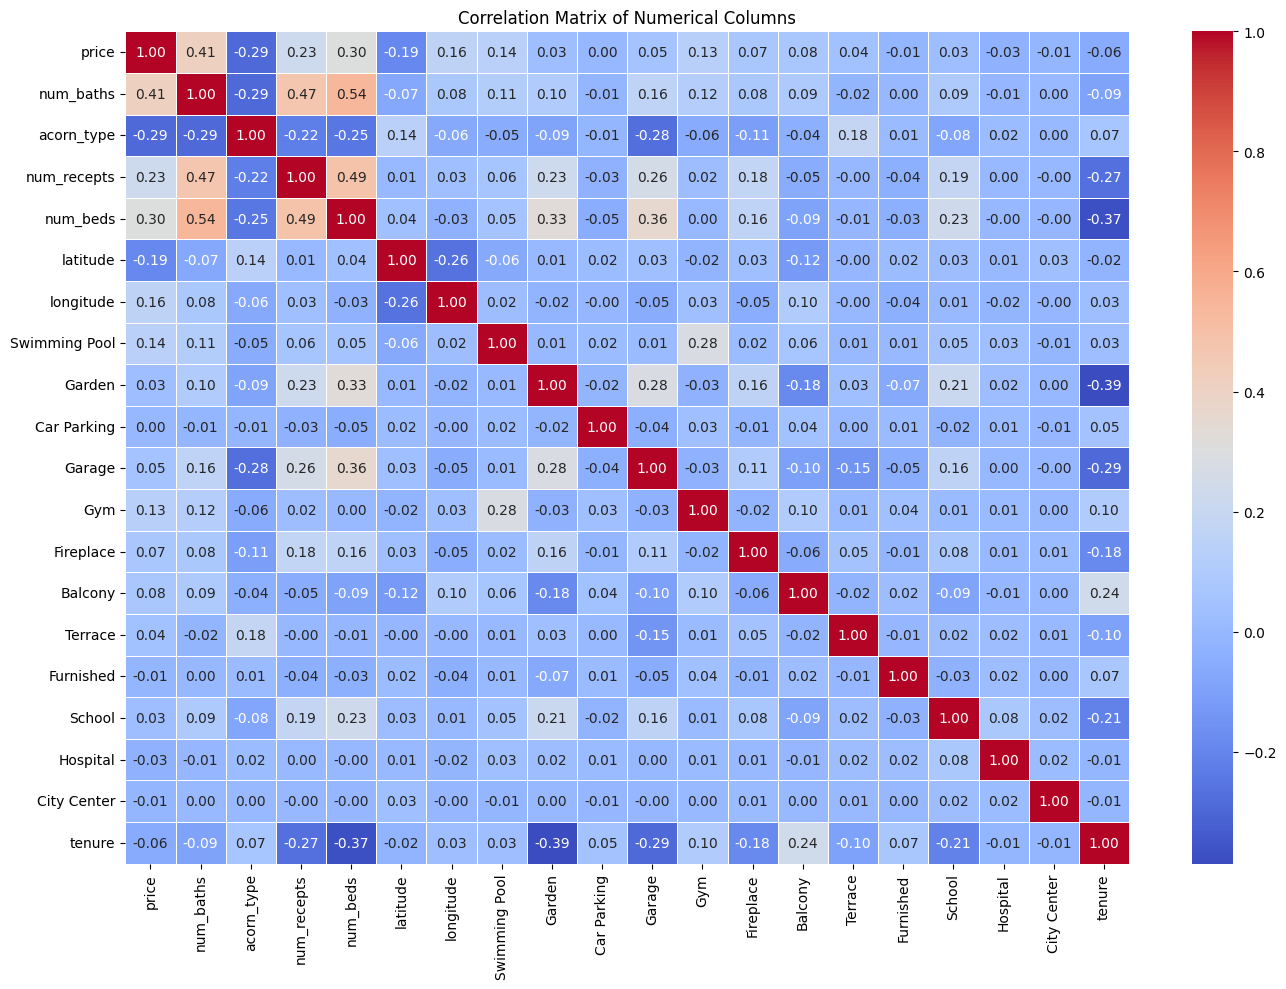

In [12]:
import seaborn as sns

# Calculate correlation matrix for numerical columns
correlation_matrix = data.corr()


plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Matrix of Numerical Columns')


plt.tight_layout()
plt.show()


From the colors, we can understand which relationships are strong (positive or negative) and which are weak.

There is a positive correlation between num_beds and price, meaning that generally, as the number of bedrooms increases, the price also tends to increase. There is a negative correlation between tenure and price, indicating that Freehold properties are generally priced higher compared to Leasehold properties

# Data Preprocessing

In [13]:
# Overview of the data columns
data.columns


Index(['property_type', 'price', 'num_baths', 'postcode', 'acorn_type',
       'display_address', 'num_recepts', 'num_beds', 'listing_condition',
       'latitude', 'longitude', 'Swimming Pool', 'Garden', 'Car Parking',
       'Garage', 'Gym', 'Fireplace', 'Balcony', 'Terrace', 'Furnished',
       'School', 'Hospital', 'City Center', 'tenure'],
      dtype='object')

By looking at the columns of the dataset, we can decide which feature interaction would be meaningful. One interaction we can consider is between num_beds and num_baths. Generally, the ratio of bedrooms to bathrooms in properties is an important factor. We will use this interaction to create a new feature named bed_bath_ratio.

In [14]:
# "Create a new feature 'bed_bath_ratio' by taking the ratio of 'num_beds' and 'num_baths'."
data['bed_bath_ratio'] = data['num_beds'] / (data['num_baths'] + 1)  # '+1' is added to avoid division by zero

# The first few values of the new feature 'bed_bath_ratio' are.
data[['bed_bath_ratio']].head()


,bed_bath_ratio
0,1.500000
1,0.666667
2,0.500000
3,0.500000
4,1.000000


"We have successfully created the new feature bed_bath_ratio."







We will encode the categorical features using One-Hot Encoding.

In [15]:
# One hot encoding of Categorical features
data_encoded = pd.get_dummies(data, columns=['property_type', 'listing_condition', 'postcode'], drop_first=True)

# First few rows of Encoded data
data_encoded.head()


,price,num_baths,acorn_type,display_address,num_recepts,num_beds,latitude,longitude,Swimming Pool,Garden,...,postcode_YO8 8EW,postcode_YO8 8GE,postcode_YO8 8HJ,postcode_YO8 8LW,postcode_YO8 8QL,postcode_YO8 9DD,postcode_YO8 9DZ,postcode_YO8 9NB,postcode_YO8 9NG,postcode_YO8 9QJ
0,165000,1,42.0,"ClaremontRoad,Bexhill-On-SeaTN39",0,3,50.857475,0.469717,0,1,...,0,0,0,0,0,0,0,0,0,0
1,180000,2,45.0,"NortonHallFarm,NortonRoad,LetchworthGardenCitySG6",1,2,51.993700,-0.208927,1,1,...,0,0,0,0,0,0,0,0,0,0
2,270000,1,19.0,"London Road, St. Albans, Hertfordshire AL1",1,1,51.750655,-0.337919,0,1,...,0,0,0,0,0,0,0,0,0,0
3,120000,1,24.0,"London Road, St.Albans AL1",1,1,51.742363,-0.322638,0,1,...,0,0,0,0,0,0,0,0,0,0
4,575000,1,14.0,"Winton Terrace Old London Road, St. Albans, He...",2,2,51.746844,-0.331082,0,1,...,0,0,0,0,0,0,0,0,0,0


In [16]:

from sklearn.preprocessing import MinMaxScaler
# Drop 'postcode' related columns
postcode_cols = [col for col in data_encoded if col.startswith('postcode_')]
data_reduced = data_encoded.drop(postcode_cols, axis=1)

# Separate again the Features and target variable
X = data_reduced.drop(['price', 'display_address'], axis=1)
y = data_reduced['price']

# Scale the Numerical features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# First rows of scaled data
X_scaled[0]


array([0.04166667, 0.74545455, 0.        , 0.09375   , 0.14974272,
       0.82740063, 0.        , 1.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 1.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.075     ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        ])

# Model Building

In [17]:
from sklearn.model_selection import train_test_split

# Dividing data into training and test set (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape


((16239, 46), (4060, 46))

# Applying ANN before the box-cox transformation on the data

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Defining the ANN model Structure
model = Sequential()

# Input layer
model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.2))

# Hidden layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))

#More hidden Layers
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)


Epoch 1/100
508/508 [==============================] - 5s 6ms/step - loss: 555643043840.0000 - val_loss: 363816681472.0000
Epoch 2/100
508/508 [==============================] - 3s 5ms/step - loss: 451100311552.0000 - val_loss: 309935276032.0000
Epoch 3/100
508/508 [==============================] - 2s 4ms/step - loss: 414513299456.0000 - val_loss: 276569784320.0000
Epoch 4/100
508/508 [==============================] - 2s 4ms/step - loss: 388066050048.0000 - val_loss: 257050411008.0000
Epoch 5/100
508/508 [==============================] - 2s 4ms/step - loss: 382460198912.0000 - val_loss: 243903741952.0000
Epoch 6/100
508/508 [==============================] - 2s 4ms/step - loss: 365481754624.0000 - val_loss: 239567224832.0000
Epoch 7/100
508/508 [==============================] - 2s 5ms/step - loss: 332200738816.0000 - val_loss: 230298697728.0000
Epoch 8/100
508/508 [==============================] - 3s 6ms/step - loss: 345314557952.0000 - val_loss: 220940632064.0000
Epoch 9/100
508/

In [19]:
ann_predictions = model.predict(X_test)


127/127 [==============================] - 0s 2ms/step


In [20]:
# Calculate the Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error

ann_mse = mean_squared_error(y_test, ann_predictions)

print(ann_mse)

372593339209.0679


In [21]:
import numpy as np
# Calculate the Root Mean Squared Error (RMSE)
ann_rmse = np.sqrt(ann_mse)
ann_rmse

610404.2424566427

In [23]:
# Calculate R^2 (coefficient of determination) regression score
from sklearn.metrics import r2_score

ann_r2 = r2_score(y_test, ann_predictions)
ann_r2

0.09263961502943496

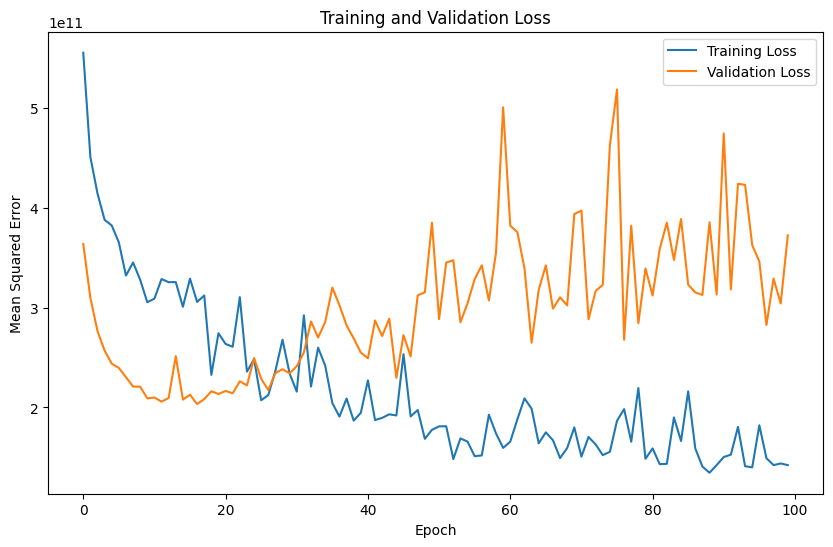

In [24]:
# This code block is for visualizing the training and validation loss of a machine learning model over epochs.
# It sets the figure size to 10 by 6 inches, plots both training and validation loss from the 'history' object,
# and labels them accordingly. The plot is titled 'Training and Validation Loss' and the x-axis and y-axis
# are labeled 'Epoch' and 'Mean Squared Error', respectively. A legend is added for clarity, and plt.show()
# displays the plot.

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

# Predicting the Results

In [26]:
import numpy as np

# 1. Taking input from user
def get_user_input():

    print("\nSelect Property Type:")
    print("1: Detached")
    print("2: Flat")
    print("3: Semi-detached")
    print("4: Terraced")
    property_type = input("Enter choice (1/2/3/4): ")

    # Number of baths
    num_baths = int(input("\nEnter number of bathrooms: "))

    # Acorn type (numerical value)
    acorn_type = float(input("\nEnter Acorn type (numerical value, e.g., 42.0): "))

    # Number of receptions
    num_recepts = int(input("\nEnter number of receptions: "))

    # Number of beds
    num_beds = int(input("\nEnter number of bedrooms: "))

    # Listing condition
    print("\nSelect Listing Condition:")
    print("1: New home")
    print("2: Previously owned")
    listing_condition = input("Enter choice (1/2): ")

    # Tenure: Freehold (0) or Leasehold (1)
    tenure = int(input("\nEnter Tenure (Freehold: 0, Leasehold: 1): "))

    # Collecting feature values in a dictionary
    user_data = {
        'property_type': property_type,
        'num_baths': num_baths,
        'acorn_type': acorn_type,
        'num_recepts': num_recepts,
        'num_beds': num_beds,
        'listing_condition': listing_condition,
        'tenure': tenure
    }

    return user_data

user_data = get_user_input()

# 2. Preprocessing the input data

# Convert user data to a format suitable for encoding and scaling
df_user = pd.DataFrame([user_data])


df_encoded = pd.get_dummies(df_user, columns=['property_type', 'listing_condition'], drop_first=True)

# Ensure that all columns in the original training data are present in the user input data
# If any column is missing (due to encoding), add it with a value of 0
for col in X.columns:
    if col not in df_encoded.columns:
        df_encoded[col] = 0

# Reorder columns to match the training data
df_encoded = df_encoded[X.columns]

# Scale the data using the same scaler used for the training data
user_input_scaled = scaler.transform(df_encoded)

# 3. Using pre-trained ANN model to make a prediction

predicted_price = model.predict(user_input_scaled)

# 4. Displaying the predicted price
print(f"The predicted price for the given property features is: {predicted_price[0]}")



Select Property Type:
1: Detached
2: Flat
3: Semi-detached
4: Terraced
Enter choice (1/2/3/4): 1

Enter number of bathrooms: 1

Enter Acorn type (numerical value, e.g., 42.0): 33

Enter number of receptions: 1

Enter number of bedrooms: 1

Select Listing Condition:
1: New home
2: Previously owned
Enter choice (1/2): 1

Enter Tenure (Freehold: 0, Leasehold: 1): 0
1/1 [==============================] - 0s 23ms/step
The predicted price for the given property features is: [4.0204054e+08]


# Applying Random Forest before box-cox Transformation

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions on the test set
rf_predictions = rf_model.predict(X_test)

# Calculating the mean squared error for random forest
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_mse


156960303548.96307

In [28]:
from sklearn.metrics import mean_squared_error

# Assuming rf_predictions and y_test are already defined and available
# Replace this with the actual MSE value if required
rf_mse = 156960303548.96307

# Calculate RMSE
rf_rmse = mean_squared_error(y_test, rf_predictions, squared=False)
rf_rmse


396182.1595541161

In [30]:
# Calculate R square for random forest
rf_r2 = r2_score(y_test, rf_predictions)
rf_r2


0.6177613862995814

# Prediction on test set

In [32]:
import numpy as np

# 1. Taking input from user
def get_user_input():

    print("\nSelect Property Type:")
    print("1: Detached")
    print("2: Flat")
    print("3: Semi-detached")
    print("4: Terraced")
    property_type = input("Enter choice (1/2/3/4): ")

    # Number of baths
    num_baths = int(input("\nEnter number of bathrooms: "))

    # Acorn type (numerical value)
    acorn_type = float(input("\nEnter Acorn type (numerical value, e.g., 42.0): "))

    # Number of receptions
    num_recepts = int(input("\nEnter number of receptions: "))

    # Number of beds
    num_beds = int(input("\nEnter number of bedrooms: "))

    # Listing condition
    print("\nSelect Listing Condition:")
    print("1: New home")
    print("2: Previously owned")
    listing_condition = input("Enter choice (1/2): ")

    # Tenure: Freehold (0) or Leasehold (1)
    tenure = int(input("\nEnter Tenure (Freehold: 0, Leasehold: 1): "))

    # Collecting feature values in a dictionary
    user_data = {
        'property_type': property_type,
        'num_baths': num_baths,
        'acorn_type': acorn_type,
        'num_recepts': num_recepts,
        'num_beds': num_beds,
        'listing_condition': listing_condition,
        'tenure': tenure
    }

    return user_data

user_data = get_user_input()

# 2. Preprocessing the input data

# Convert user data to a format suitable for encoding and scaling
df_user = pd.DataFrame([user_data])


df_encoded = pd.get_dummies(df_user, columns=['property_type', 'listing_condition'], drop_first=True)


for col in X.columns:
    if col not in df_encoded.columns:
        df_encoded[col] = 0

# Reorder columns to match the training data
df_encoded = df_encoded[X.columns]

# Scale the data using the same scaler used for the training data
user_input_scaled = scaler.transform(df_encoded)

# 3. Using pre-trained ANN model to make a prediction

predicted_price = rf_model.predict(user_input_scaled)

# 4. Displaying the predicted price
print(f"The predicted price for the given property features is: {predicted_price[0]}")


Select Property Type:
1: Detached
2: Flat
3: Semi-detached
4: Terraced
Enter choice (1/2/3/4): 2

Enter number of bathrooms: 1

Enter Acorn type (numerical value, e.g., 42.0): 33

Enter number of receptions: 1

Enter number of bedrooms: 1

Select Listing Condition:
1: New home
2: Previously owned
Enter choice (1/2): 1

Enter Tenure (Freehold: 0, Leasehold: 1): 0
The predicted price for the given property features is: 217870.0


# Applying the Box-cox Transformation

Lets try transformation technique using Box-cox

In [33]:

price_stats = data['price'].describe()

# checking outliers using IQR
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1
outlier_condition = ((data['price'] < (Q1 - 1.5 * IQR)) | (data['price'] > (Q3 + 1.5 * IQR)))

# display the number of outliers
outlier_count = outlier_condition.sum()

# Check skewness
skewness = data['price'].skew()

# Basic statistics, outlier count, and skewness
price_stats, outlier_count, skewness


(count    2.029900e+04
 mean     4.551478e+05
 std      6.966499e+05
 min      0.000000e+00
 25%      2.000000e+05
 50%      3.250000e+05
 75%      5.000000e+05
 max      4.500000e+07
 Name: price, dtype: float64,
 1366,
 21.687739164402267)

In [34]:
import numpy as np

# Apply log transformation to the price column
data['log_price'] = np.log1p(data['price'])

# New skewness
new_skewness = data['log_price'].skew()

# the log-transformed price
log_price_stats = data['log_price'].describe()

log_price_stats, new_skewness


(count    20299.000000
 mean        12.674681
 std          0.868922
 min          0.000000
 25%         12.206078
 50%         12.691584
 75%         13.122365
 max         17.622173
 Name: log_price, dtype: float64,
 -2.418110040978967)

In [35]:
# lets Check for entries with zero and near-zero prices
zero_price_entries = data[data['price'] <= 0]
near_zero_price_entries = data[(data['price'] > 0) & (data['price'] < 100)]  # Arbitrarily chosen threshold

# Display the number of zero and near-zero price entries
zero_price_count = zero_price_entries.shape[0]
near_zero_price_count = near_zero_price_entries.shape[0]

zero_price_count, near_zero_price_count

(15, 0)

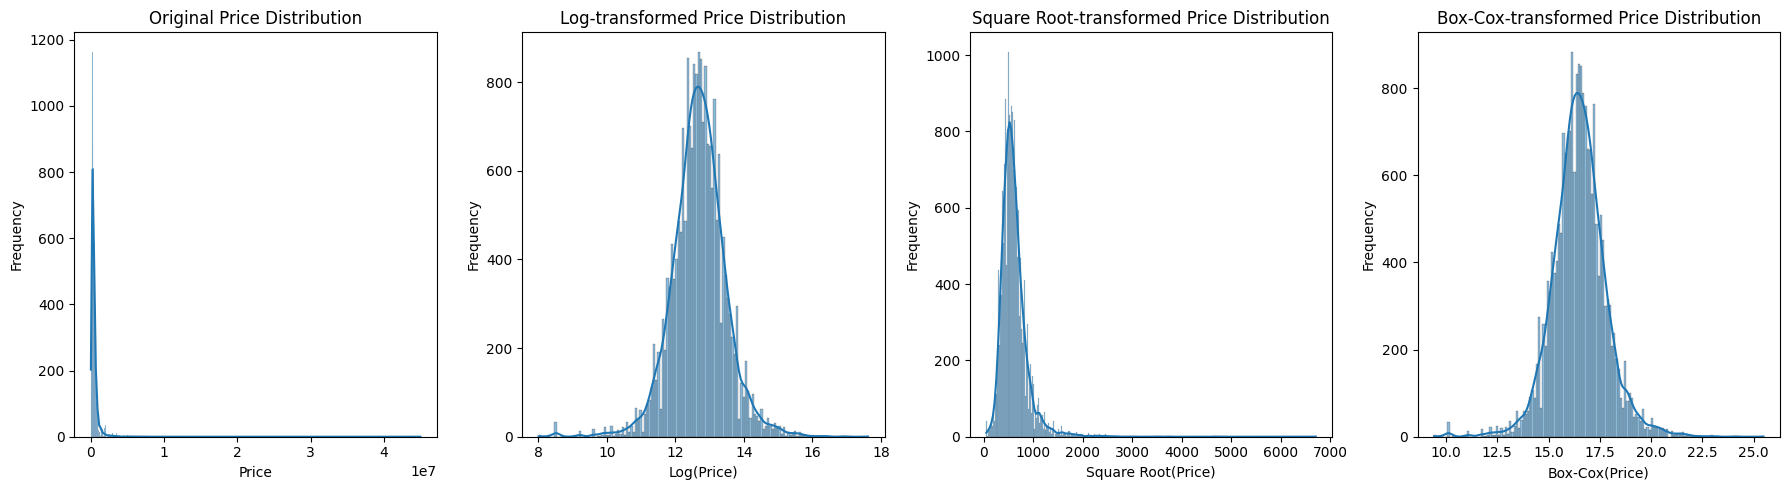

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Remove entries with zero or negative prices for the transformation
data_non_zero = data[data['price'] > 0]

# Log transform the prices
log_prices = np.log(data_non_zero['price'])

# Square root transform the prices
sqrt_prices = np.sqrt(data_non_zero['price'])

# Apply Box-Cox transformation
boxcox_prices, _ = stats.boxcox(data_non_zero['price'] + 1)


plt.figure(figsize=(18, 5))

# Original Price Distribution
plt.subplot(1, 4, 1)
sns.histplot(data_non_zero['price'], kde=True)
plt.title('Original Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Log Price Distribution
plt.subplot(1, 4, 2)
sns.histplot(log_prices, kde=True)
plt.title('Log-transformed Price Distribution')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

# Square Root Price Distribution
plt.subplot(1, 4, 3)
sns.histplot(sqrt_prices, kde=True)
plt.title('Square Root-transformed Price Distribution')
plt.xlabel('Square Root(Price)')
plt.ylabel('Frequency')

# Box-Cox Price Distribution
plt.subplot(1, 4, 4)
sns.histplot(boxcox_prices, kde=True)
plt.title('Box-Cox-transformed Price Distribution')
plt.xlabel('Box-Cox(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


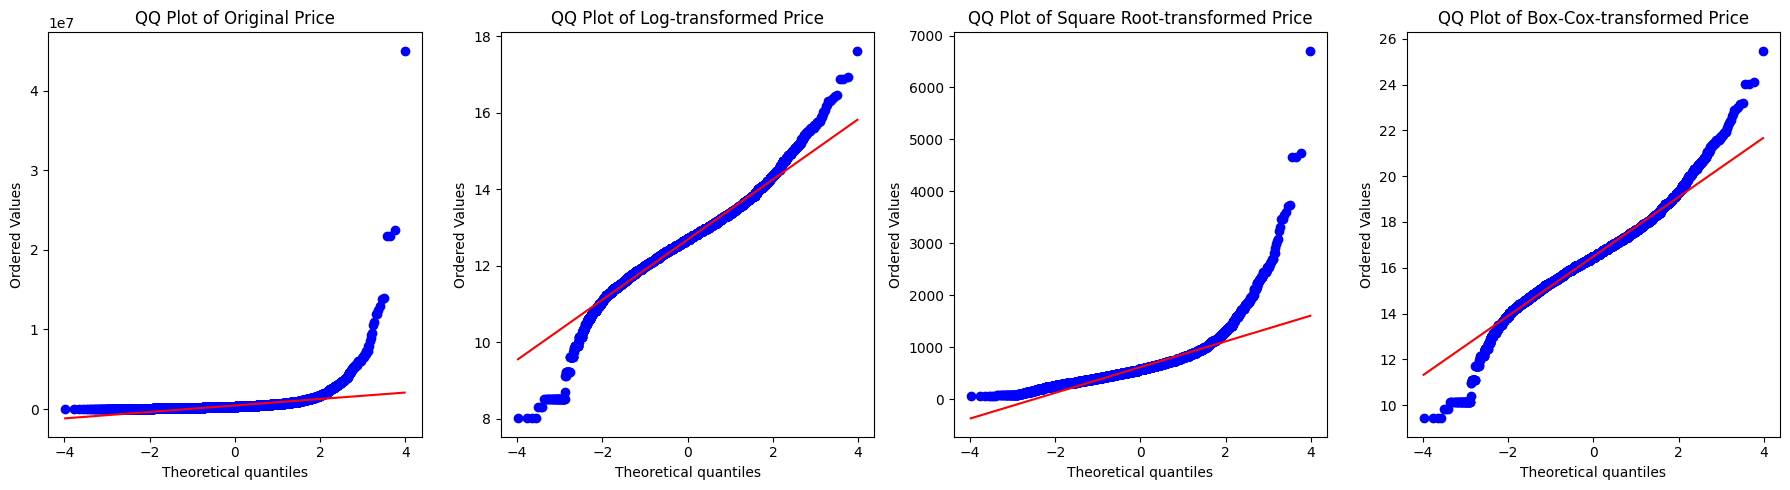

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Remove entries with zero or negative prices for the transformation
data_non_zero = data[data['price'] > 0]

# Log transform the prices
log_prices = np.log(data_non_zero['price'])

# Square root transform the prices
sqrt_prices = np.sqrt(data_non_zero['price'])

# Apply Box-Cox transformation
boxcox_prices, _ = stats.boxcox(data_non_zero['price'] + 1)

# Set up the matplotlib figure space
plt.figure(figsize=(18, 5))

# QQ plot for Original Price Distribution
plt.subplot(1, 4, 1)
stats.probplot(data_non_zero['price'], dist="norm", plot=plt)
plt.title('QQ Plot of Original Price')

# QQ plot for Log Price Distribution
plt.subplot(1, 4, 2)
stats.probplot(log_prices, dist="norm", plot=plt)
plt.title('QQ Plot of Log-transformed Price')

# QQ plot for Square Root Price Distribution
plt.subplot(1, 4, 3)
stats.probplot(sqrt_prices, dist="norm", plot=plt)
plt.title('QQ Plot of Square Root-transformed Price')

# QQ plot for Box-Cox Price Distribution
plt.subplot(1, 4, 4)
stats.probplot(boxcox_prices, dist="norm", plot=plt)
plt.title('QQ Plot of Box-Cox-transformed Price')

plt.tight_layout()
plt.show()


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from scipy.stats import boxcox

# Handling missing values
# For categorical columns we will use the most frequent value
# For numerical columns we will use median
categorical_cols = data.select_dtypes(include=['object', 'bool']).columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns.drop('price')

# Imputers
categorical_imputer = SimpleImputer(strategy='most_frequent')
numerical_imputer = SimpleImputer(strategy='median')

# lets perform One-hot encoding for categorical variables
categorical_transformer = Pipeline(steps=[
    ('imputer', categorical_imputer),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

#perform Scaling for numerical variables
numerical_transformer = Pipeline(steps=[
    ('imputer', numerical_imputer),
    ('scaler', MinMaxScaler())
])

#  preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Apply preprocessing
X = data.drop('price', axis=1)
y = data['price']
X_preprocessed = preprocessor.fit_transform(X)



In [39]:
# Check for non-positive values in the price column
non_positive_prices = data[data['price'] <= 0]
non_positive_prices_count = non_positive_prices.shape[0]

# Display how many non-positive prices are present
non_positive_prices_count, non_positive_prices


(15,
        property_type  price  num_baths  postcode  acorn_type  \
 174             flat      0          1   B14 7QU        50.0   
 3144   semi_detached      0          3  CM23 4AS        18.0   
 3145   semi_detached      0          2  CM23 4AS        18.0   
 3146        detached      0          4  CM23 4AS        18.0   
 3147        detached      0          3  CM23 4AS        18.0   
 3148        detached      0          2  CM23 4AS        18.0   
 5925            land      0          0  EX11 1SQ         5.0   
 6702        bungalow      0          2  GU23 7AD        10.0   
 7410            farm      0          0   HR1 3NP         5.0   
 13054       detached      0          0   PE7 8US        24.0   
 18902           flat      0          0   W10 5SA        16.0   
 18903           flat      0          0   W10 5SA        16.0   
 18904           flat      0          0   W10 5SA        16.0   
 18905           flat      0          0   W10 5SA        16.0   
 18906           fla

In [40]:
# Remove records with non-positive price values
data_positive_prices = data[data['price'] > 0]

# Recheck to ensure removal
non_positive_prices_after_removal = data_positive_prices[data_positive_prices['price'] <= 0].shape[0]

# Proceed with the Box-Cox transformation on the cleaned dataset
y_positive_prices = data_positive_prices['price']
y_boxcox_positive, fitted_lambda_positive = boxcox(y_positive_prices)

# Update the preprocessing with the cleaned data
X_positive_prices = data_positive_prices.drop('price', axis=1)
X_preprocessed_positive = preprocessor.fit_transform(X_positive_prices)

# Split the preprocessed data into training and testing sets with the cleaned target
X_train_positive, X_test_positive, y_train_boxcox_positive, y_test_boxcox_positive = train_test_split(
    X_preprocessed_positive, y_boxcox_positive, test_size=0.2, random_state=42
)

# Output the shape of the data and the lambda value to confirm
X_train_positive.shape, X_test_positive.shape, y_train_boxcox_positive.shape, y_test_boxcox_positive.shape, fitted_lambda_positive, non_positive_prices_after_removal


((16227, 36886), (4057, 36886), (16227,), (4057,), 0.0395850682354275, 0)

# Building the random forest model after box cox transformation

In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
# Train the Random Forest model on the Box-Cox transformed prices
rf_model_boxcox = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_boxcox.fit(X_train_positive, y_train_boxcox_positive)

RandomForestRegressor(random_state=42)

In [42]:
# Predict on the test set
rf_predictions_boxcox = rf_model_boxcox.predict(X_test_positive)

In [43]:
# Calculate the mean squared error
rf_mse_boxcox = mean_squared_error(y_test_boxcox_positive, rf_predictions_boxcox)
rf_rmse_boxcox = np.sqrt(rf_mse_boxcox)



In [44]:
print("Random forest mean square error", rf_mse_boxcox)

Random forest mean square error 0.00024215065082936903


In [45]:
print('Random forest root mean square error',rf_rmse_boxcox)

Random forest root mean square error 0.015561190533804573


In [46]:
from sklearn.metrics import r2_score

# Assuming 'rf_predictions_boxcox' are your model's predictions after Box-Cox transformation,
# and 'y_test_boxcox_positive' is the Box-Cox transformed test target.
rf_r2_boxcox = r2_score(y_test_boxcox_positive, rf_predictions_boxcox)
rf_r2_boxcox


0.9998632786523434

# Building the ANN after box cox Transformation

In [47]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# ANN model ki structure define karte hain
model = Sequential()

# Input layer
model.add(Dense(128, activation='relu', input_dim=X_train_positive.shape[1]))
model.add(Dropout(0.2))

# Hidden layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

#More hidden Layers
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(1))

# Model ko compile karte hain
model.compile(optimizer='adam', loss='mean_squared_error')

# Model ki training shuru karte hain
history = model.fit(X_train_positive, y_train_boxcox_positive, epochs=100, batch_size=32, validation_data=(X_test_positive, y_test_boxcox_positive), verbose=1)

Epoch 1/100
508/508 [==============================] - 41s 76ms/step - loss: 39.5926 - val_loss: 23.7813
Epoch 2/100
508/508 [==============================] - 39s 77ms/step - loss: 13.6648 - val_loss: 2.4903
Epoch 3/100
508/508 [==============================] - 37s 73ms/step - loss: 10.9634 - val_loss: 3.2171
Epoch 4/100
508/508 [==============================] - 37s 73ms/step - loss: 9.9373 - val_loss: 1.9673
Epoch 5/100
508/508 [==============================] - 38s 75ms/step - loss: 9.2925 - val_loss: 1.0946
Epoch 6/100
508/508 [==============================] - 38s 75ms/step - loss: 9.0488 - val_loss: 2.3975
Epoch 7/100
508/508 [==============================] - 37s 73ms/step - loss: 8.5207 - val_loss: 1.4842
Epoch 8/100
508/508 [==============================] - 37s 72ms/step - loss: 8.1104 - val_loss: 1.3206
Epoch 9/100
508/508 [==============================] - 34s 67ms/step - loss: 7.4555 - val_loss: 1.0501
Epoch 10/100
508/508 [==============================] - 38s 74ms/step

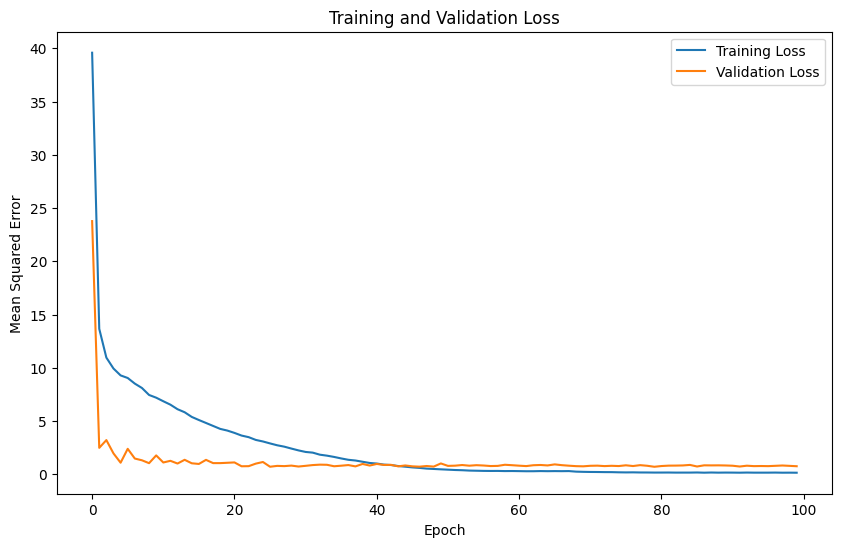

In [48]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

In [49]:
ann_transformed_predictions = model.predict(X_test_positive)

127/127 [==============================] - 0s 2ms/step


In [50]:
from sklearn.metrics import mean_squared_error
# Calculate the Mean Squared Error (MSE)
ann_mse_transform = mean_squared_error(y_test_boxcox_positive, ann_transformed_predictions)

print("ANN Mean Square Error for transformed data", ann_mse_transform)

ANN Mean Square Error for transformed data 0.7634090879369448


In [51]:
ann_rmse_transformed = np.sqrt(ann_mse_transform)
print("ANN Root Mean Square error", ann_rmse_transformed)

ANN Root Mean Square error 0.8737328470058482


In [53]:
# Calculating the R-squared value for the transformed data
ann_r2_transform = r2_score(y_test_boxcox_positive, ann_transformed_predictions)
ann_r2_transform

0.5689694867282458

# THE END